<a href="https://colab.research.google.com/github/GRACENGARI/customer-segmentation/blob/main/CUSTOMER_SEGMENTATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
uploaded =files.upload()

Saving How-Customer-Segmentation-can-be-Used-in-Product-Development.jpg to How-Customer-Segmentation-can-be-Used-in-Product-Development.jpg


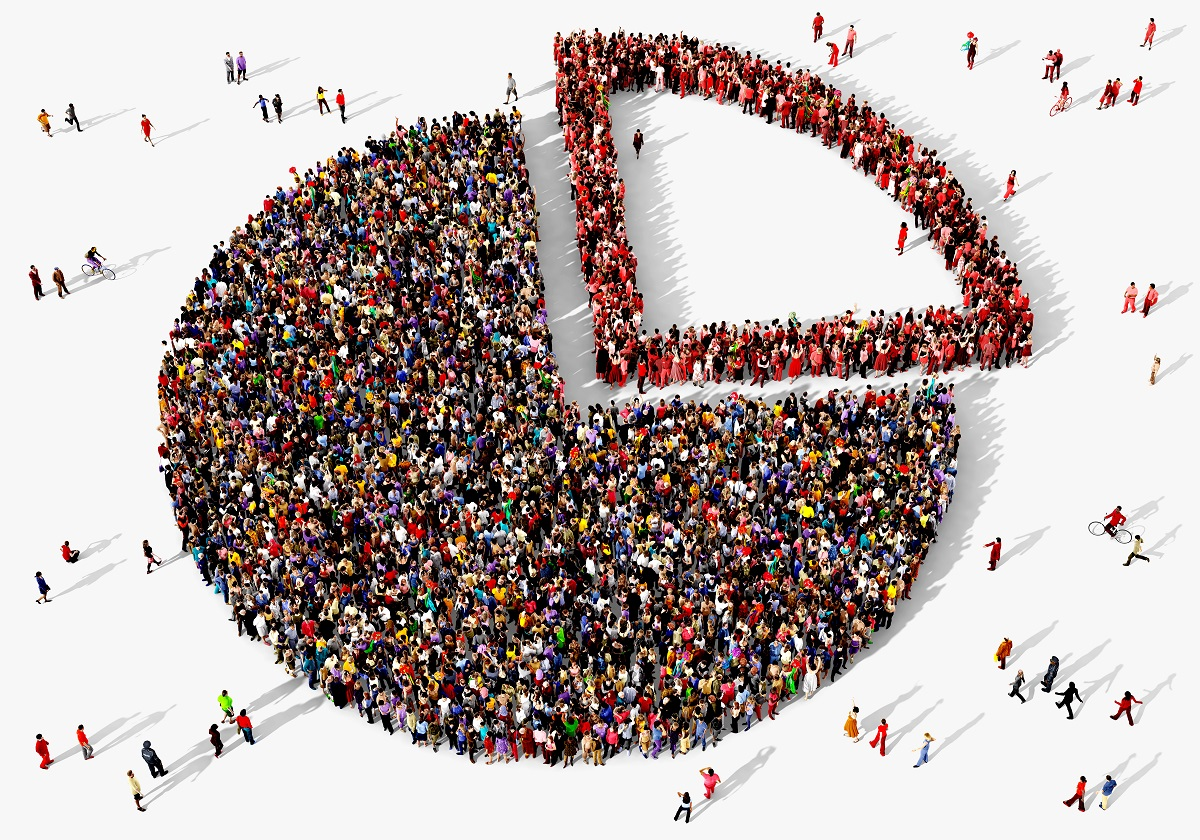

In [ ]:
Image('How-Customer-Segmentation-can-be-Used-in-Product-Development.jpg',width=800)

INTRODUCTION:
IN  marketing and selling products or services, it is essential to put in mind that different customers have different preferences, needs, and behaviors, and it's crucial to understand these differences to effectively reach and engage with them. One powerful way to do this is by segmenting customers by age. By doing so, you can tailor your marketing strategies to better resonate with each group and ultimately drive more sales and customer loyalty.

Moreover a company that generates high profits is more valuable than a company that generates low profits. The value of a business is determined by its ability to generate future profits. Hence, it is vital for a company to understand which product is generating high profit.

In [ ]:
# Importing the Required Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import plotting
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.style.use('fivethirtyeight')

In [ ]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import seaborn as sns
plt.style.use('ggplot')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import missingno as msno
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
df = pd.read_csv("/content/Mall_Customers(1).csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


EXPLORING THE DATASET

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#CHECKING FOR NULL VALUES
df.sum().isnull()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


IS THERE A TREND ON THE DISTRIBUTION OF CUSTOMER ID BASED ON  AGE

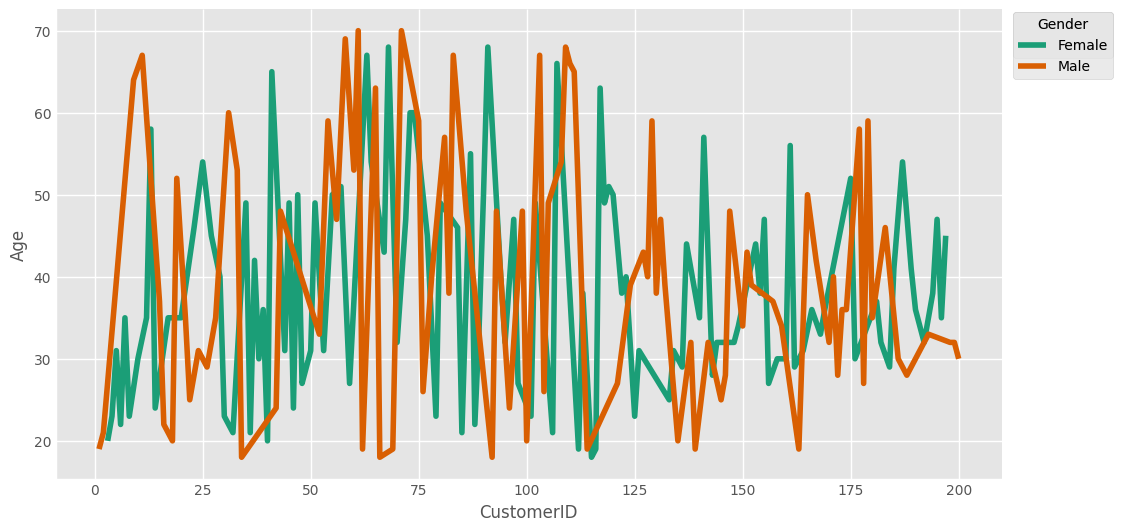

In [ ]:
# @title CustomerID vs Age

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['CustomerID']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('CustomerID', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Gender')):
  _plot_series(series, series_name, i)
  fig.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('CustomerID')
_ = plt.ylabel('Age')

THERE IS A POSITIVE CORELATION BETWEEN  CUSTOMER ID AND AGE

IS THERE A CORELATION ON THE PURCHASING  BEHAVIOUR BETWEEN MALES AND FEMALES?

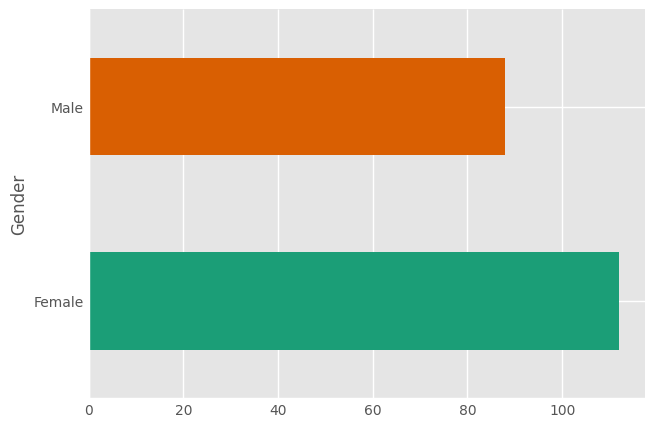

In [ ]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

FEMALES HAVE A HIGHER PURCHASING BEHAVIOUR THAN MALES

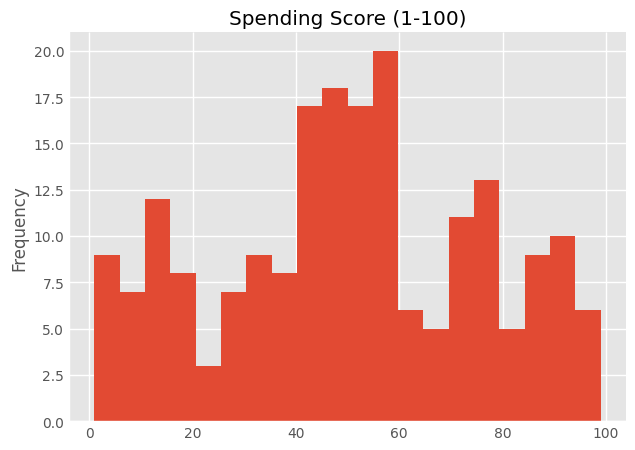

In [ ]:
# @title Spending Score (1-100)

from matplotlib import pyplot as plt
df['Spending Score (1-100)'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

DO CUSTOMERS WITH HIGHER EARNING INCOME HAVE HIGHER SPENDING SCORES

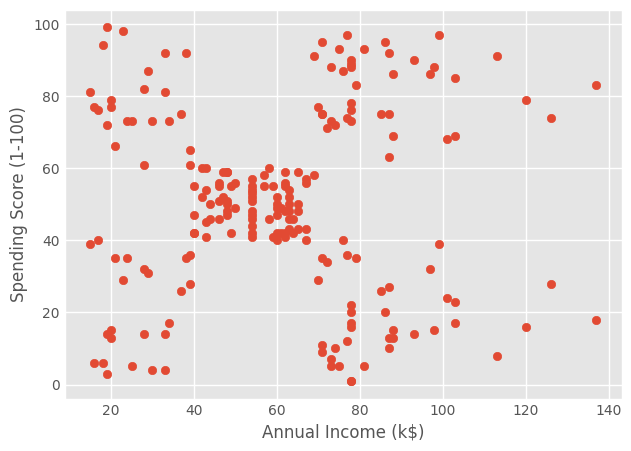

In [ ]:
# @title Spending Score vs Income

import matplotlib.pyplot as plt
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Spending Score (1-100)')

FROM THE ABOVE IT IS EVIDENT THAT THERE IS NO CORELATION BETWEEN SPENDING SCORE AND INCOME  

WHAT IS THE RELATIONSHIP BETWEEN AGE AND PURCHASING BEHAVIOUR?

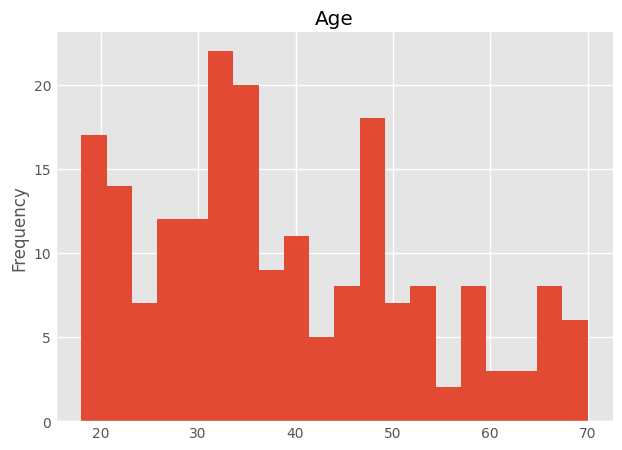

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

the age and purchasing behaviour  is not normally distributed ie left skewed since people within the age of 20-45 have higher purchasing behaviour than those in the 60-70 bracket

is there any observable pattern between gender and customer id?

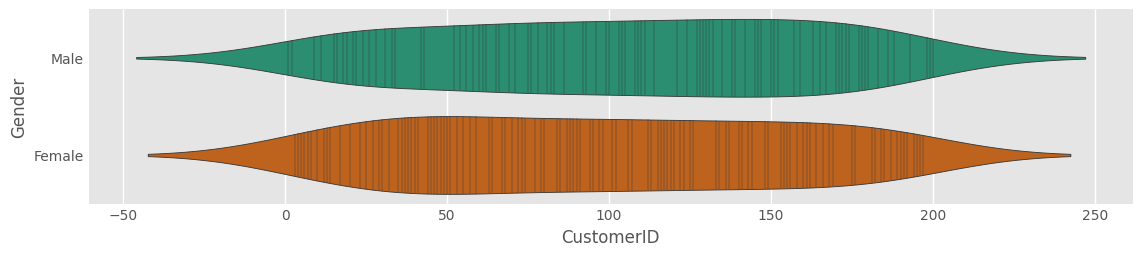

In [ ]:
# @title Gender vs CustomerID

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CustomerID', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

There is a normal distribution ie normally distributed between  gender and customer ID

DROPPING CUSTOMER ID COLUMN

In [ ]:
# Dropping the Customer ID Column

df.drop('CustomerID',axis=1,inplace=True)

In [ ]:
print("Mean of Annual Income (k$) of Female:",df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",df['Annual Income (k$)'].loc[df['Gender'] == 'Male'].mean())


Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


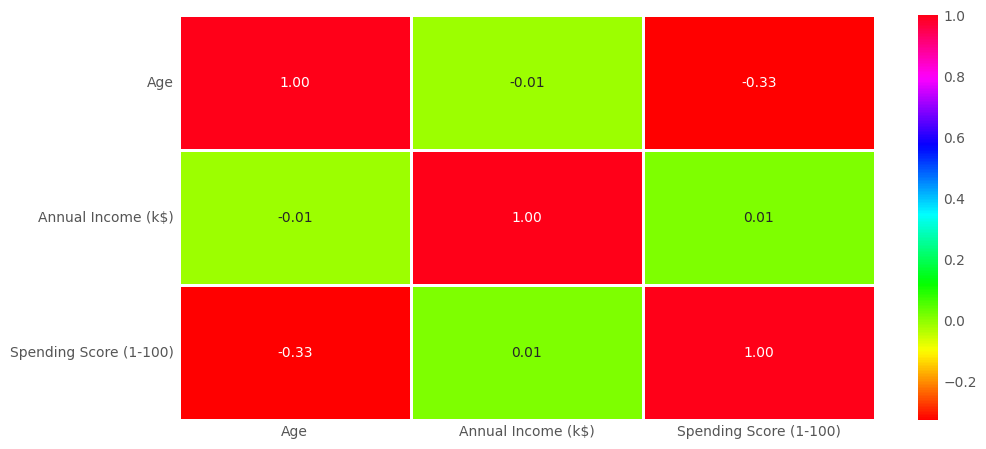

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

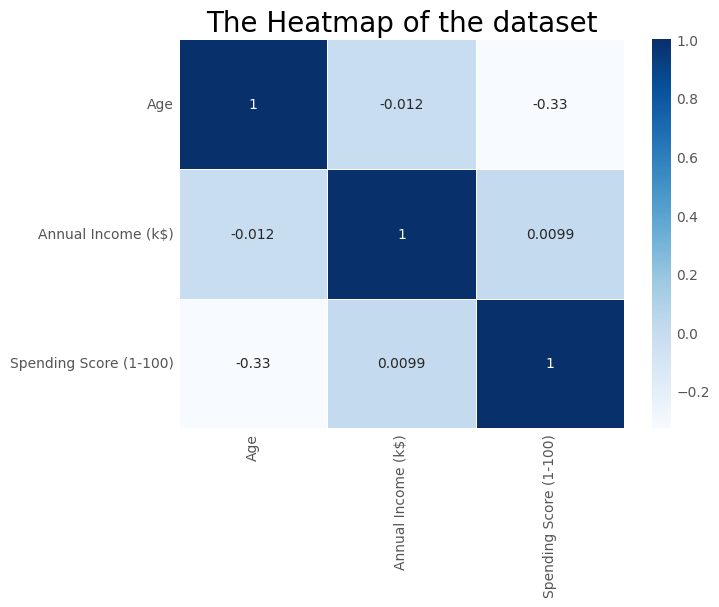

In [ ]:
hm=sns.heatmap(df.iloc[:,1:5].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='The Heatmap of the dataset', fontsize=20)
hm
plt.ioff()

Annual Income with Spending Score forms together an interesting picture, look at it later. Age and Annual Income distribution don't seems like normal. They are both shifted to left. Spending Score, at first glance, has too large tails to be normal. But remember, that these conclusions based on histograms, and they can change very high by switch number of bins. So, plot in addition kdeplot from seaborn:

In [ ]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
print(len(df.Age.unique()))

51


In [ ]:
df.Age.value_counts()[:10]


32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

In [ ]:
# Looking at the Age Column values
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

CREATING AN AGE CATEGORY

In [ ]:
# Creating new category
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Adult
4,Female,31,17,40,Adult


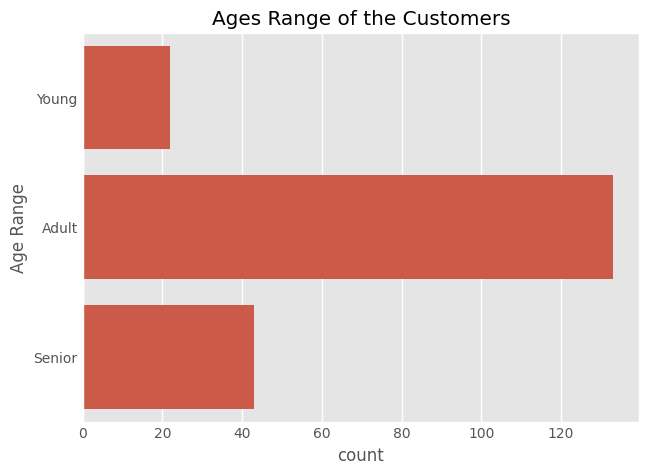

In [ ]:
sns.countplot(df['Age Range'])
plt.title('Ages Range of the Customers')
plt.show()

In [ ]:
df.Age.value_counts()[:3]

32    11
35     9
19     8
Name: Age, dtype: int64

EXPLORING THE GENDER COLUMN

In [ ]:
# Show Gender Column Unique

df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
#show gender value counts
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

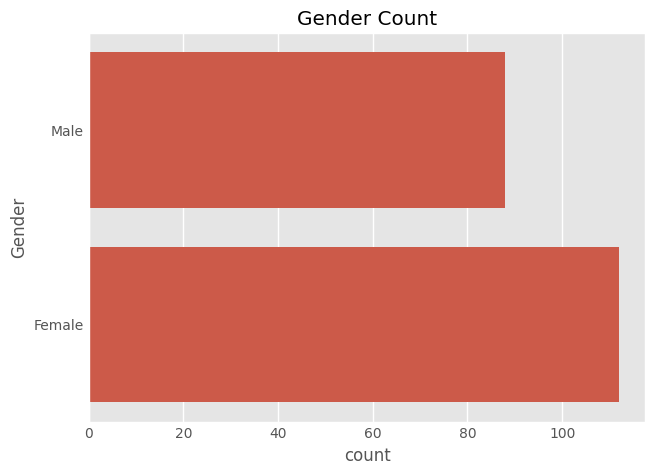

In [ ]:
# Visualizing the Gender Column

sns.countplot(df.Gender)
plt.title('Gender Count')
plt.show()

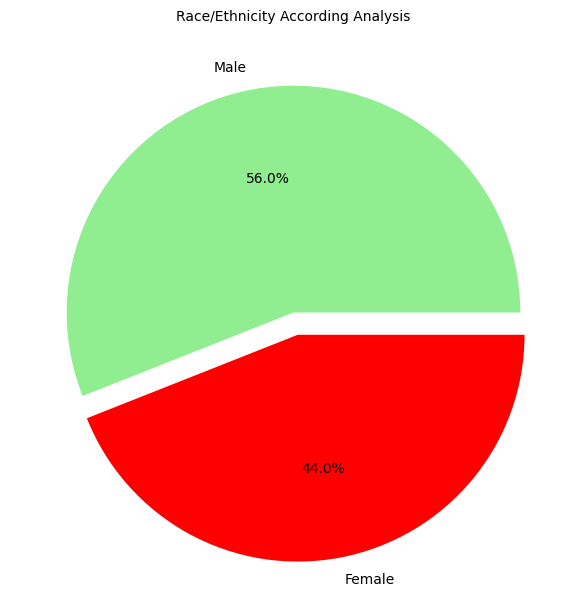

In [ ]:

labels=df.Gender.unique()
colors=['lightgreen','red']
explode=[0,0.1]
values=df.Gender.value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

In [ ]:
#Male Age
print('Max  :',max(df[df['Gender']=='Male'].Age))
print('Min  :',min(df[df['Gender']=='Male'].Age))
print('Mean :',np.mean(df[df['Gender']=='Male'].Age))
print('Std  :',np.std(df[df['Gender']=='Male'].Age))


Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472944


In [ ]:
#Female Age
print('Max  :',max(df[df['Gender']=='Female'].Age))
print('Min  :',min(df[df['Gender']=='Female'].Age))
print('Mean :',np.mean(df[df['Gender']=='Female'].Age))
print('Std  :',np.std(df[df['Gender']=='Female'].Age))


Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581055


DECODING CATEGORICAL VARIABLE

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['Gender'].values)
df['Gender'] = integer_encoded
df.head(7)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range
0,1,19,15,39,Young
1,1,21,15,81,Young
2,0,20,16,6,Young
3,0,23,16,77,Adult
4,0,31,17,40,Adult
5,0,22,17,76,Adult
6,0,35,18,6,Adult


NUMERICAL FEATURE  DISTRIBUTION

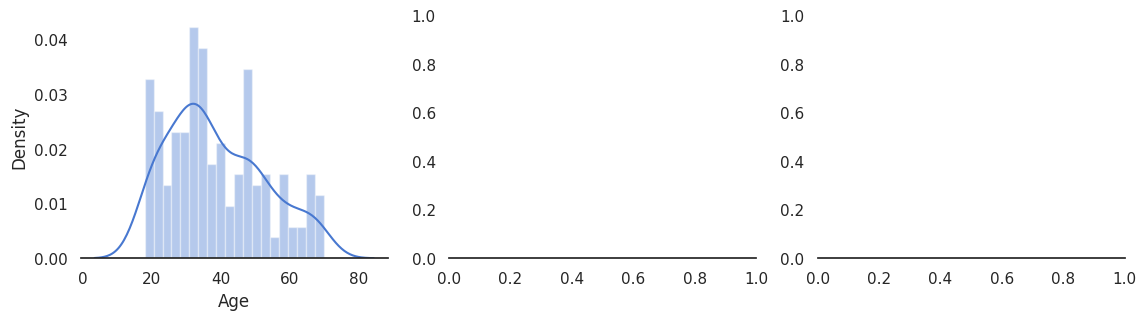

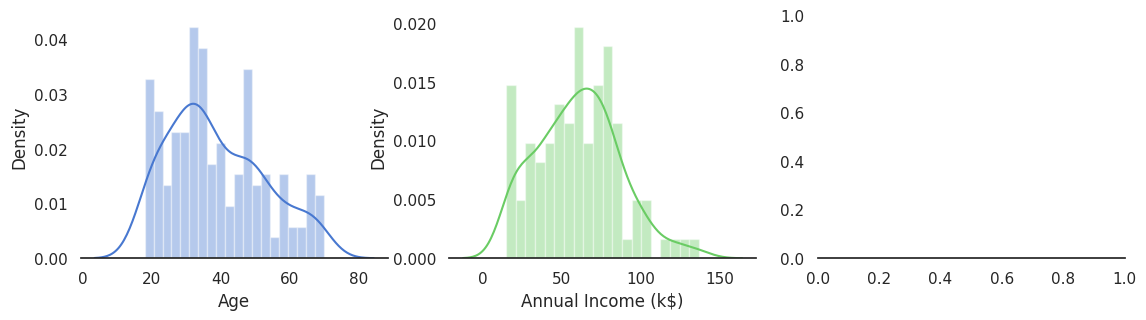

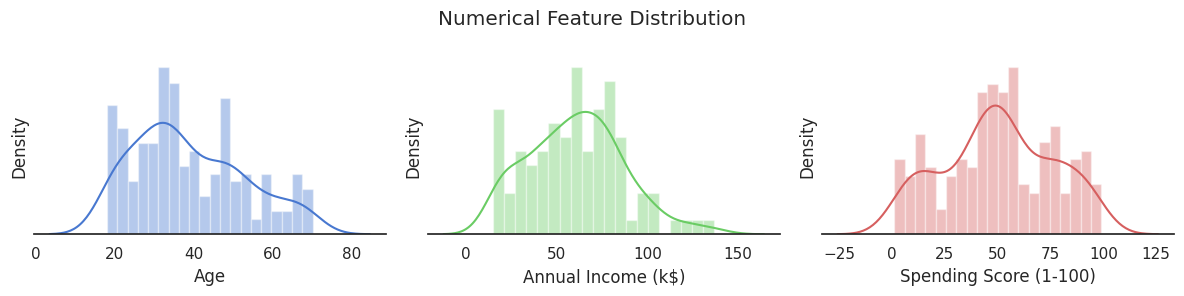

In [ ]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(df['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(df['Annual Income (k$)'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(df['Spending Score (1-100)'], bins=20, ax=axs[2], color='r')

fig.suptitle('Numerical Feature Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

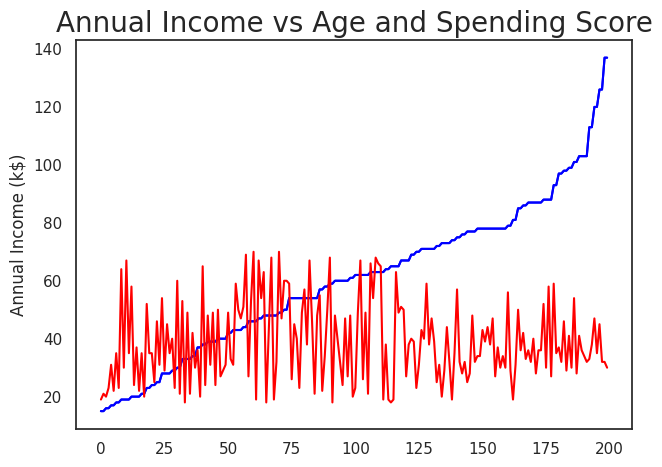

In [ ]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x,  color = 'blue')
sns.lineplot(y, color = 'red')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

PAIRPLOT VIZUALIZATION

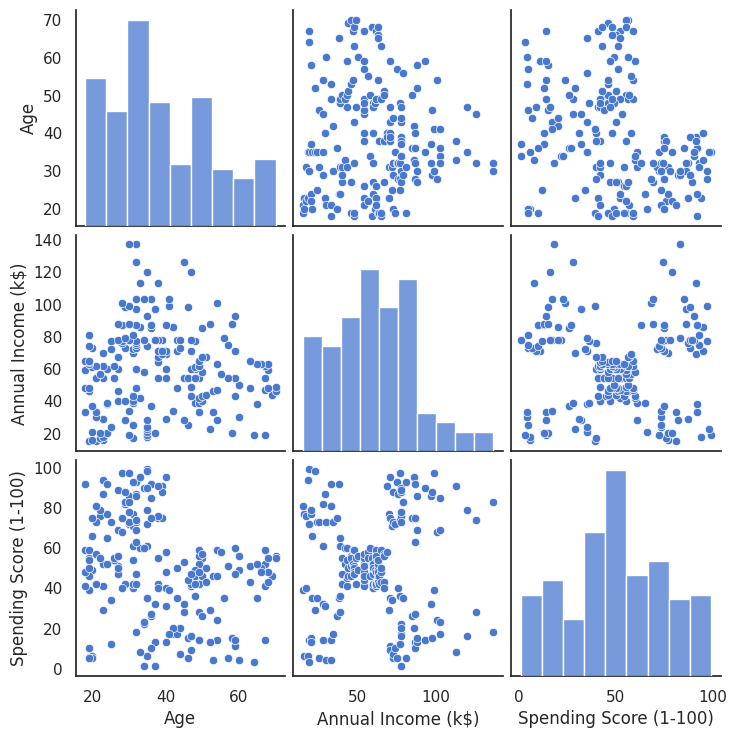

In [ ]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

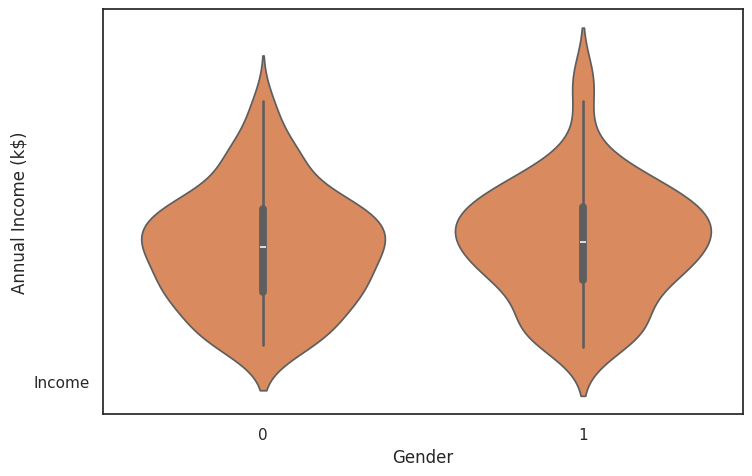

In [ ]:
sns.violinplot(x="Gender", y="Annual Income (k$)", data=df)
plt.show()

MODEL BUILDING PROCESS
SEGMENTATION 1:USING ALL THE Fdfdfdf

In [ ]:
df_1 = df.iloc[:,2:5]
df_1.head(3)




,Annual Income (k$),Spending Score (1-100),Age Range
0,15,39,Young
1,15,81,Young
2,16,6,Young


In [ ]:
df_1 = df.iloc[:,2:5]

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
df_1 = pd.DataFrame(np.random.rand(100, 3), columns=["x", "y", "z"])
clusters=kmeans.fit_predict(df_1)

In [ ]:
df_1['Cluster'] = clusters
sns.pairplot(df_1)

In [ ]:
df_2 = df.iloc[:,2:5]
df_2.head(5)

,Annual Income (k$),Spending Score (1-100),Age Range
0,15,39,Young
1,15,81,Young
2,16,6,Young
3,16,77,Adult
4,17,40,Adult
